<a href="https://colab.research.google.com/github/DavidS324/Sexton_David_Math24/blob/main/Sexton_David_Alexnet_Load_Slides_All_Math24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description: Ship Classifier

Overview:
The Ship Classifier project aims to develop a system utilizing the AlexNet convolutional neural network architecture to accurately distinguish between military and civilian ships from images. The system will be trained on a dataset comprised of both military and civilian vessels to enable it to make informed classifications. By deploying this AI model, it becomes possible to enhance maritime security, aid in surveillance activities, and streamline maritime operations.

Objectives:

Develop a model capable of distinguishing between military and civilian ships with high accuracy.

Train the model on a dataset of ship images encompassing various classes and angles.

Evaluate the performance of the classifier through rigorous testing and validation procedures to ensure reliability and efficiency.
Methodology:

Data Collection:

Gather a diverse dataset of ship images, including both military and civilian vessels, sourced from publicly available repositories and maritime databases.

Expected Outcomes:

A ship classification model capable of accurately distinguishing between military and civilian vessels.
Improved efficiency and effectiveness in maritime surveillance and security operations through automated ship identification.
Enhanced situational awareness for maritime authorities, enabling timely response to potential threats or security breaches.

Conclusion:
The Ship Classifier project leveraging AlexNet AI presents a promising solution for automating the identification of military and civilian ships, with significant implications for maritime security, surveillance, and operational efficiency. By harnessing the power of deep learning and image recognition technologies, this project aims to contribute to the advancement of maritime safety and security in an increasingly complex and dynamic maritime environment.







In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb
# Import necessary functions and tools

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor

# Define functions used for importing and analyzing datasets comprised of images

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 95.8MB/s]


In [ ]:
url = "https://docs.google.com/presentation/d/18Ot6qrYGK30T_wCMB4UXfQJrKx0P6CCrvUDpjrbMQ9g/edit#slide=id.g2b78f0cde19_0_5"
#URL where dataset is stored

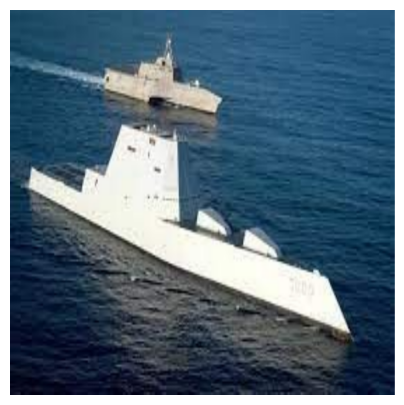

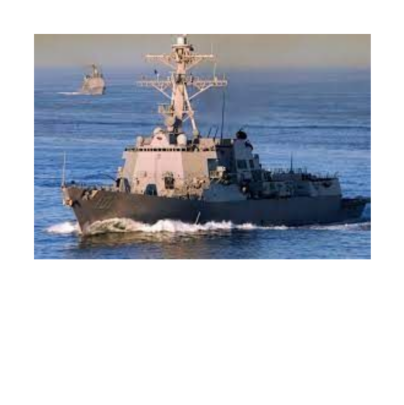

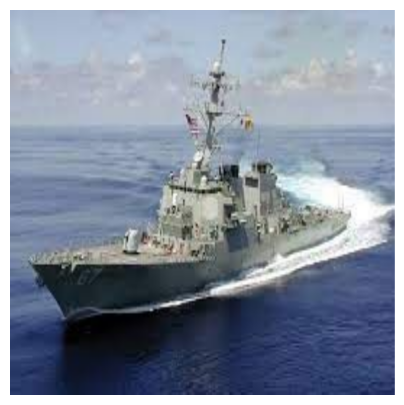

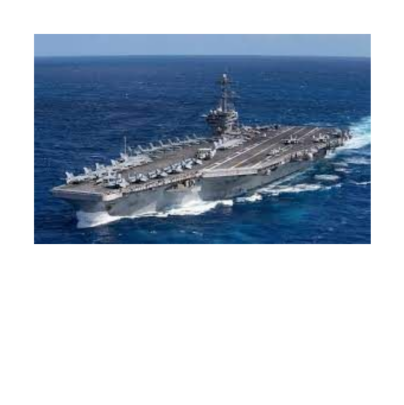

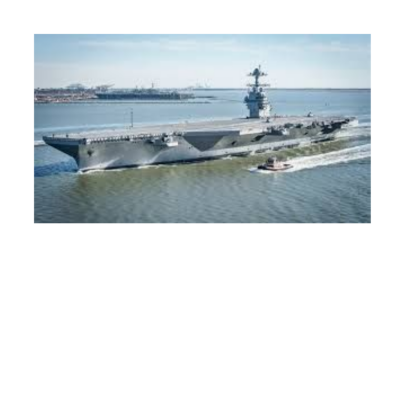

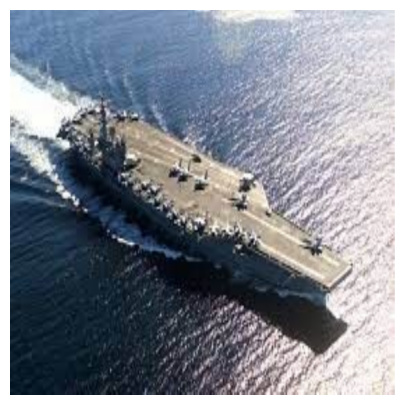

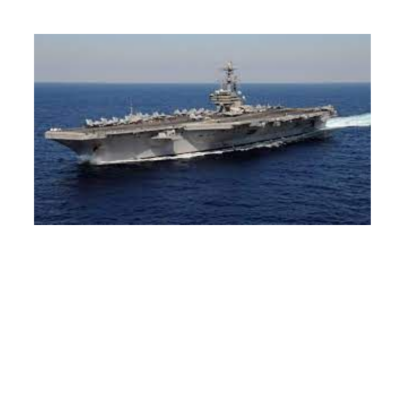

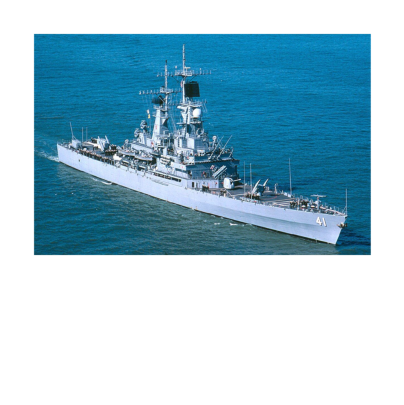

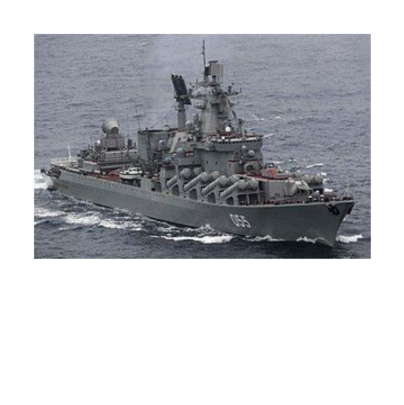

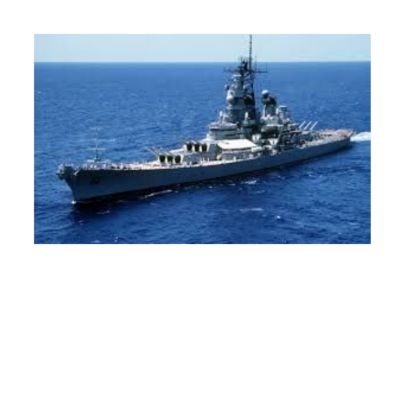

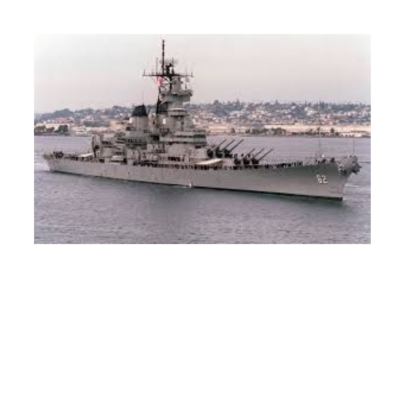

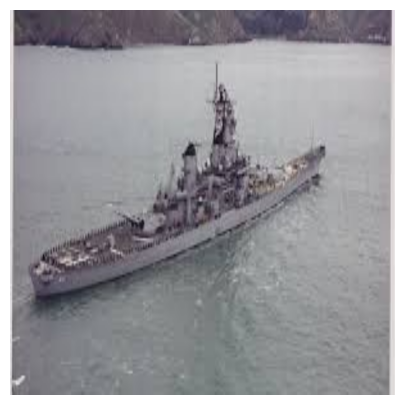

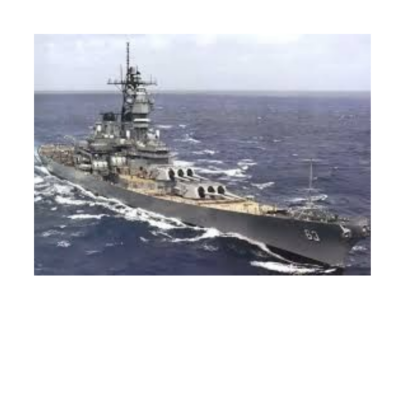

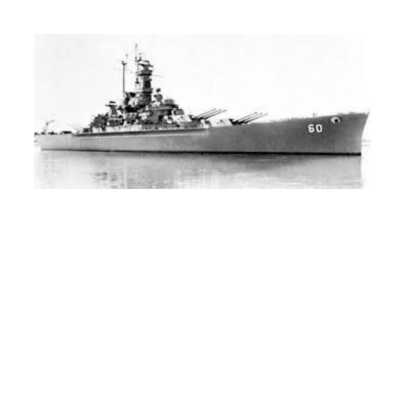

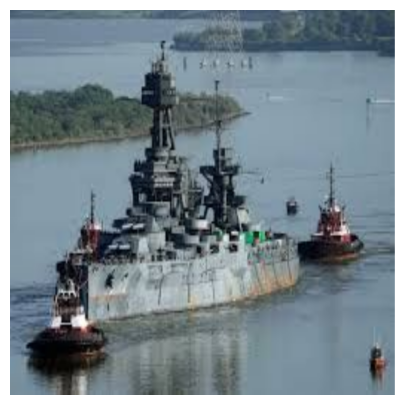

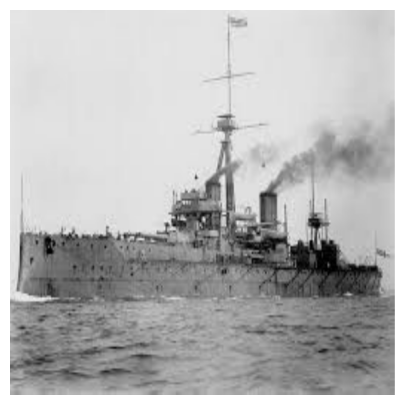

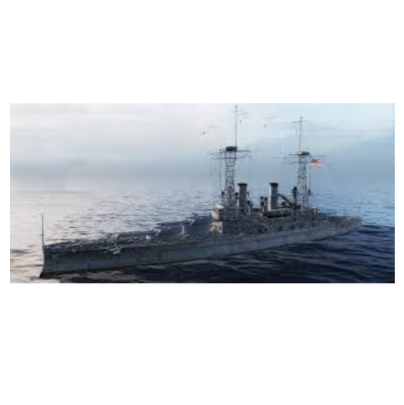

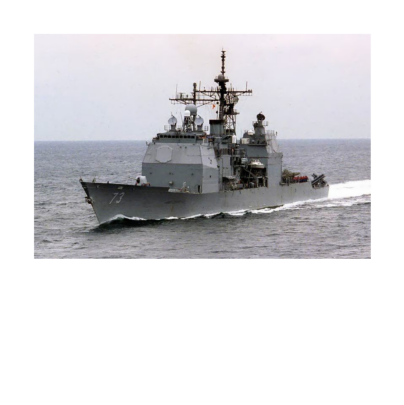

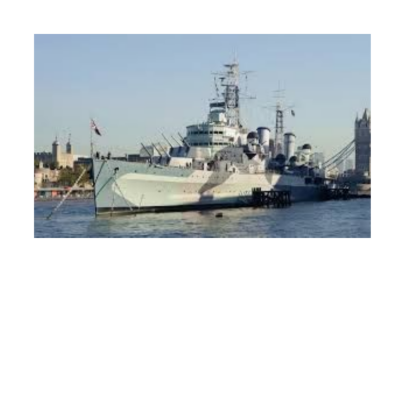

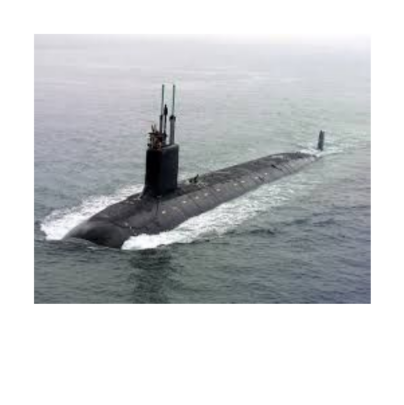

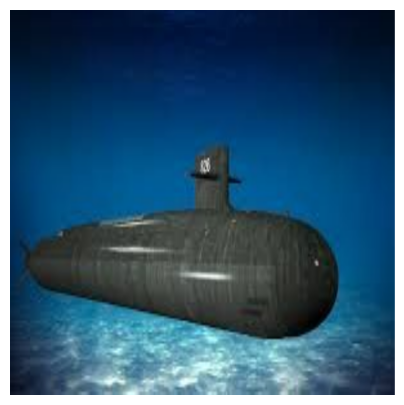

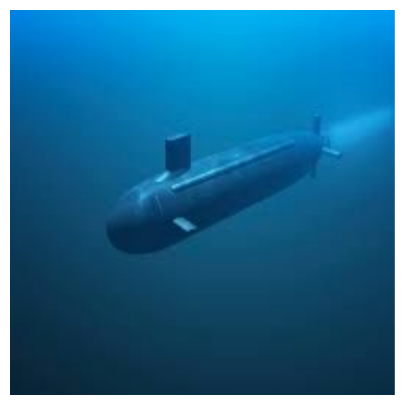

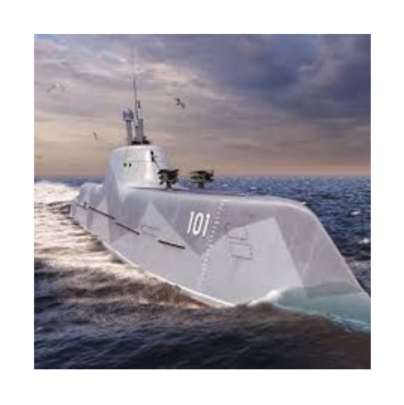

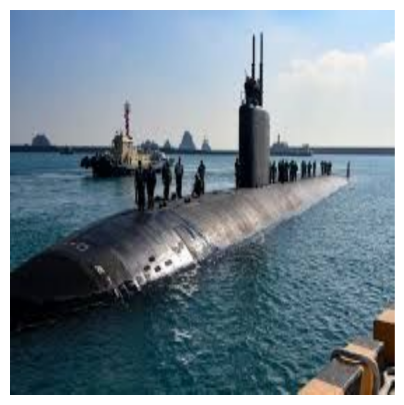

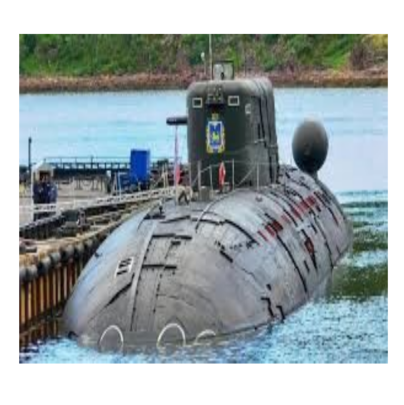

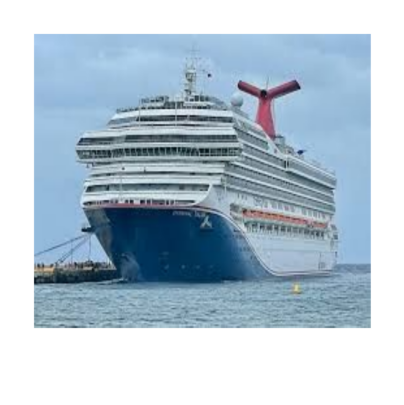

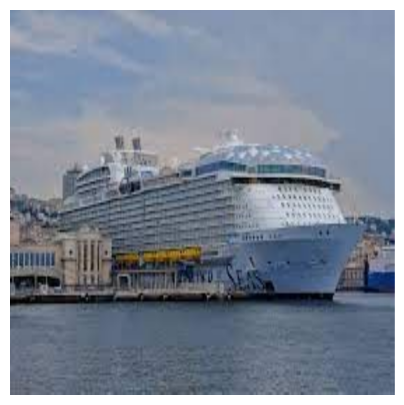

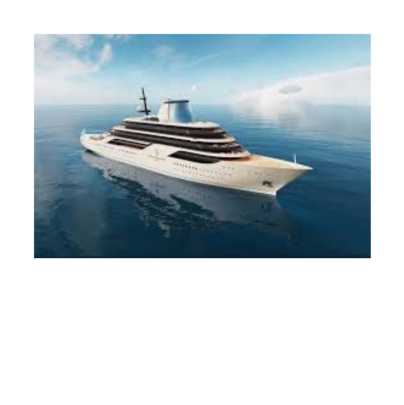

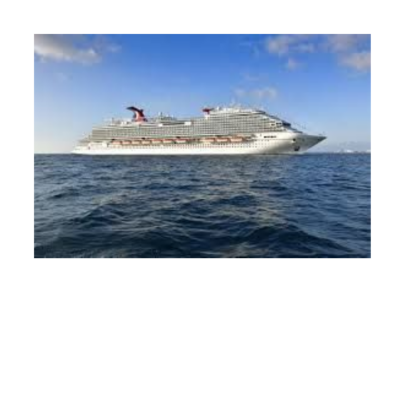

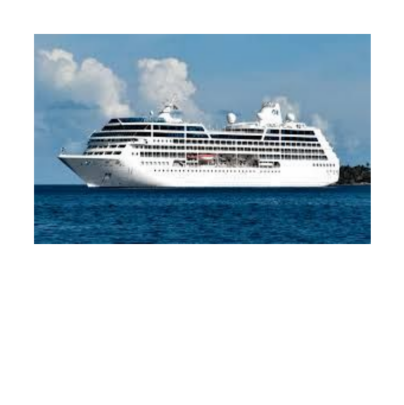

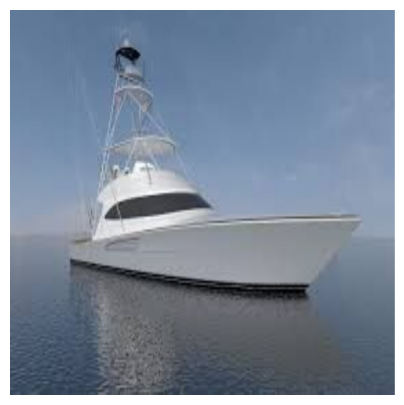

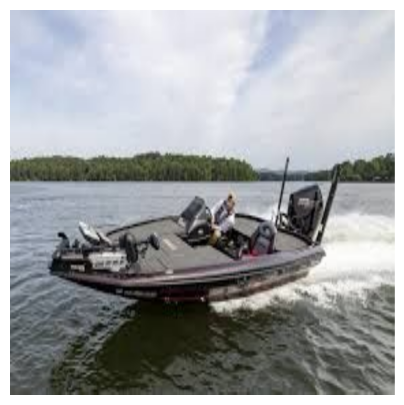

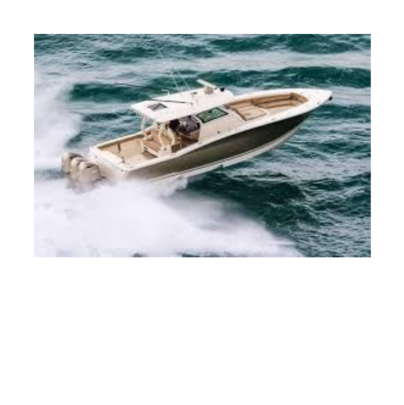

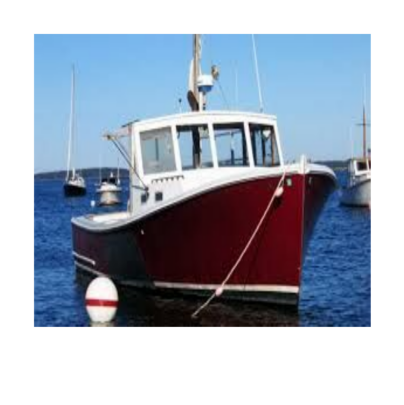

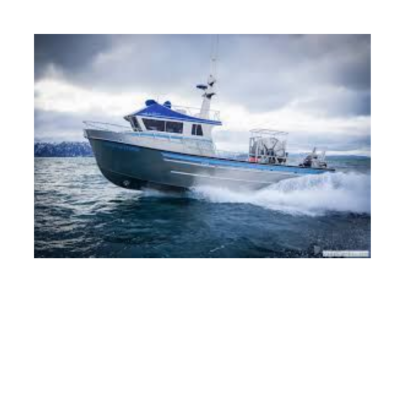

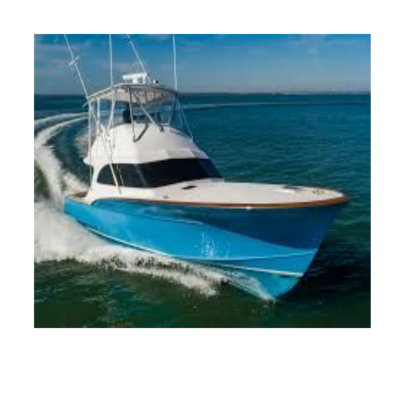

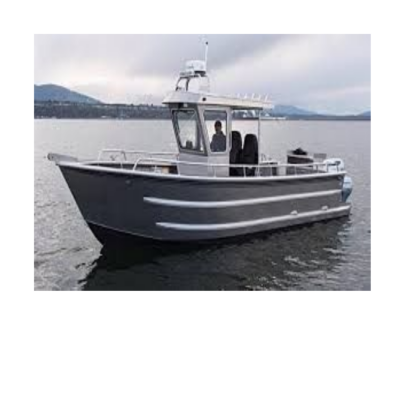

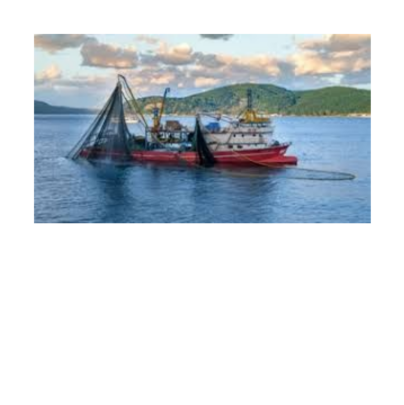

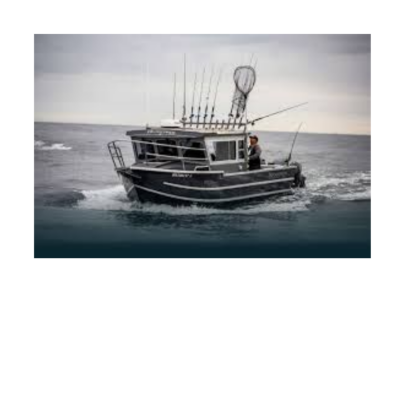

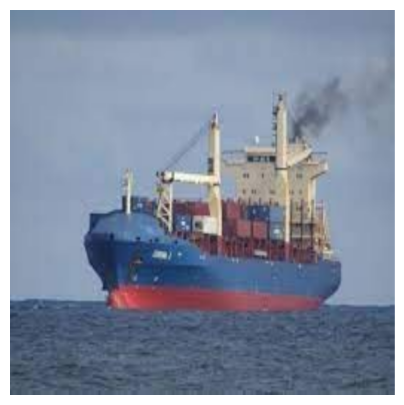

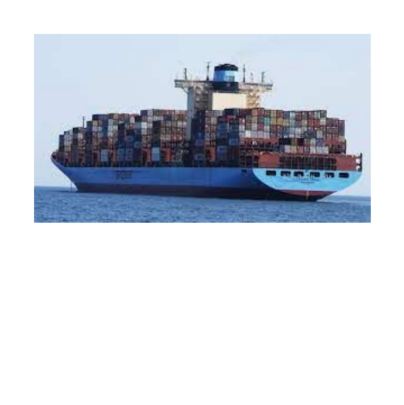

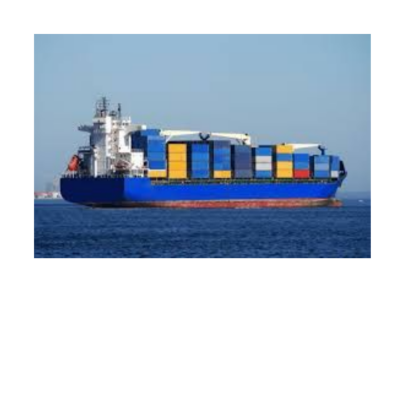

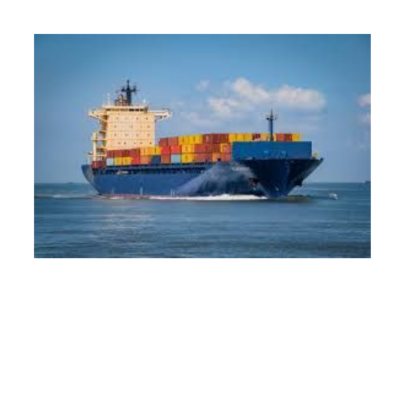

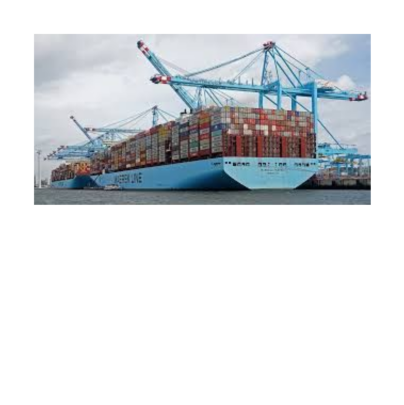

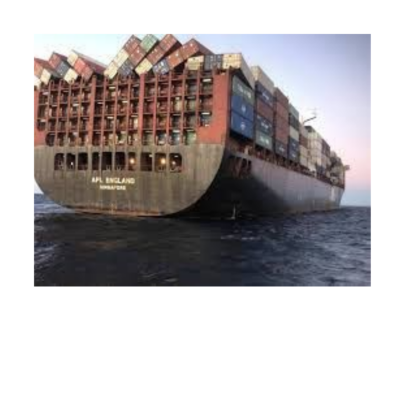

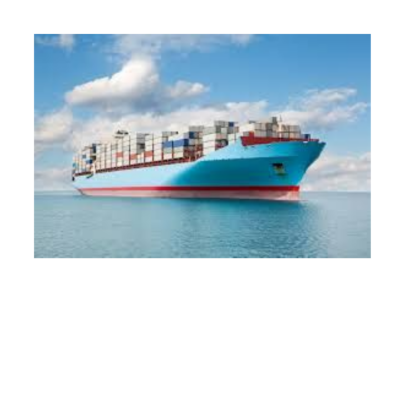

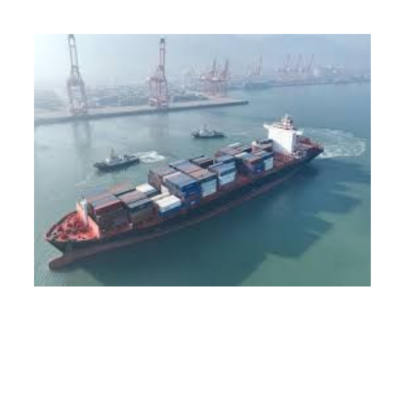

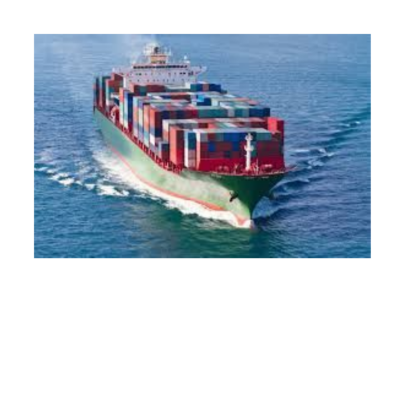

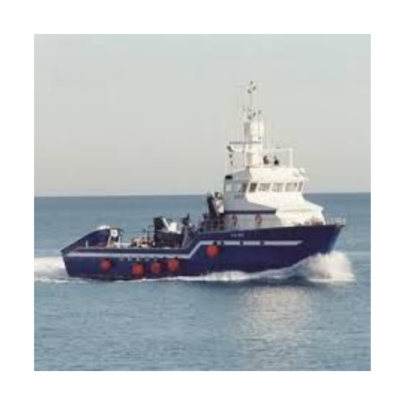

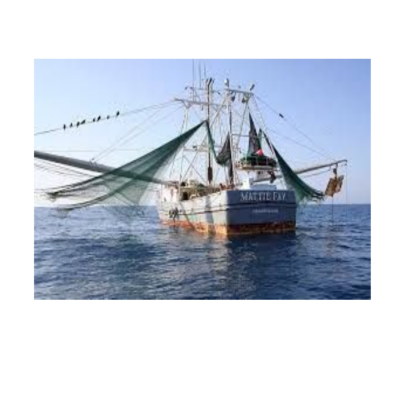

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)
# Gets images from the URL and displays them

In [ ]:
images.shape
#Gives the shape of the images array

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)
# Gives the different color values of each item in the images array

tensor([[-0.6145, -5.1143,  4.0825,  ..., -4.7134,  1.2293, -0.2570],
        [ 0.6406, -4.0042,  0.3121,  ..., -3.7450, -1.6078, -4.2886],
        [-0.8389, -5.6727,  6.4131,  ..., -3.1369, -0.2842, -3.1405],
        ...,
        [-0.3387, -1.7614,  0.4636,  ..., -6.2734, -0.8060,  2.2293],
        [-1.0995, -2.1904, -0.1779,  ..., -6.4005, -3.0640, -0.0390],
        [-0.7695, -0.3067, -0.6341,  ..., -5.6374, -0.1535,  0.1159]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)
#Sets y as the color values for later use

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft carrier, carrier, flattop, attack aircraft carrier
submarine, pigboat, sub, U-boat
aircraft carrier, carrier, flattop, attack aircraft carrier
aircraft

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy()

In [ ]:
X.shape

(50, 1000)

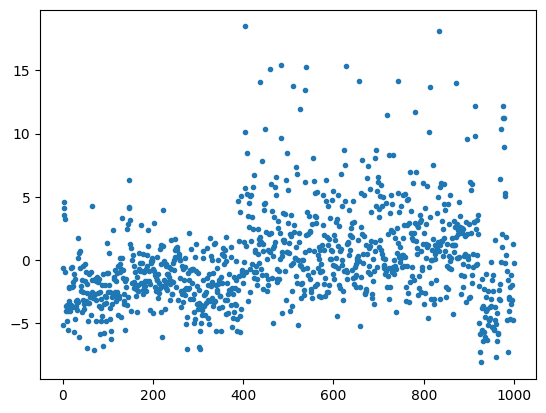

In [ ]:
plt.plot(X[0],'.')

(array([ 36., 169., 348., 257., 108.,  44.,  18.,   7.,  11.,   2.]),
 array([-8.10651302, -5.44808149, -2.78964996, -0.13121843,  2.5272131 ,
         5.18564463,  7.84407616, 10.50250816, 13.16093922, 15.81937027,
        18.47780228]),
 <BarContainer object of 10 artists>)

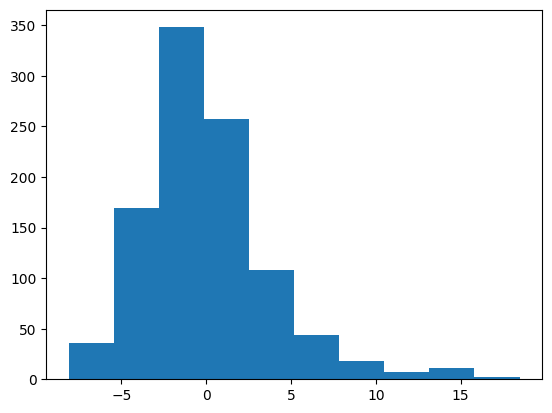

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-13a1dae5b345>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)


KeyboardInterrupt: 